# Uber Data Anapysis Project

## Load the data set and important library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("UberDataset.csv")

## Clean the data set

In [4]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21.11,01-01-2016 21.17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 1.25,01-02-2016 1.37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20.25,01-02-2016 20.38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17.31,01-05-2016 17.45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14.42,01-06-2016 15.49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
df['START_DATE'] = df['START_DATE'].apply(
    lambda x :x.replace(".",":")
)

In [12]:
df['START_DATE'] = df['START_DATE'].apply(
    lambda x :x.replace("/","-")
)

In [14]:
df['START_DATE']  = pd.to_datetime(df['START_DATE'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   object        
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 63.3+ KB


In [18]:
df['END_DATE'] = pd.to_datetime(
    df['END_DATE'].apply(
        lambda x:x.replace(".",":").replace("/","-")
    )
)

In [19]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
df.sample(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
569,7/19/2016 10:35,7/19/2016 10:51,Business,Whitebridge,Stonewater,6.4,Customer Visit
1140,12/29/2016 18:59,12/29/2016 19:14,Business,Kar?chi,Unknown Location,3.0,Meal/Entertain
709,8/25/2016 16:36,8/25/2016 16:56,Business,Unknown Location,Unknown Location,5.5,NaN
239,3/18/2016 8:35,3/18/2016 8:43,Business,Midtown,Midtown,1.1,Meal/Entertain
701,8/23/2016 13:19,8/23/2016 13:30,Business,Noorpur Shahan,Islamabad,4.4,NaN
179,03-03-2016 11:04,03-03-2016 11.10,Business,Westpark Place,Whitebridge,2.3,Errand/Supplies
932,11-10-2016 14:57,11-10-2016 15.07,Business,SOMISSPO,Tenderloin,1.1,NaN
816,10/16/2016 12:52,10/16/2016 13:11,Business,Cary,Durham,10.5,Meeting
445,6/15/2016 16:37,6/15/2016 17:02,Business,Lower Garden District,Lakeview,6.4,Customer Visit
8,01-10-2016 8:05,01-10-2016 8.25,Business,Cary,Morrisville,8.3,Meeting


## Fix all the column names to lower case?

In [22]:
old_name = list(df.columns)

In [23]:
new_name = []
for i in old_name:
    new_name.append(i.lower())
new_name

['start_date', 'end_date', 'category', 'start', 'stop', 'miles', 'purpose']

In [24]:
df.columns = new_name

In [25]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## How many total trips were made?

In [30]:
df.duplicated().sum()

np.int64(1)

In [34]:
df.drop_duplicates(inplace=True)

In [36]:
df.shape[0]

1154

## What is the average trip distance (in miles)?

In [38]:
df['miles'].mean().round(2)

np.float64(10.57)

## Which city pairs (START ➝ STOP) are the most frequent routes?

In [39]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [42]:
df['trip'] = df['start'] +"-"+ df['stop']

In [43]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach


In [44]:
df['trip'].value_counts()

trip
Unknown Location-Unknown Location    86
Morrisville-Cary                     75
Cary-Morrisville                     67
Cary-Cary                            53
Cary-Durham                          36
                                     ..
Gampaha-Ilukwatta                     1
Flatiron District-Midtown             1
Cary-Unknown Location                 1
Unknown Location-Morrisville          1
Downtown-Central                      1
Name: count, Length: 363, dtype: int64

In [50]:
df[~df['trip'].str.contains("Unknown Location")]['trip'].value_counts().head(1)

trip
Morrisville-Cary    75
Name: count, dtype: int64

## What is the most common trip purpose? (excluding missing/NaN values)

In [51]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach


In [56]:
df[df['purpose'].notna()]['purpose'].value_counts().head(1)

purpose
Meeting    186
Name: count, dtype: int64

## How many trips were made each month? Which month had the most trips?

In [57]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,trip
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach


In [61]:
df['month'] = df['start_date'].dt.month_name()

In [63]:
df['month'].value_counts()

month
December     146
August       133
November     122
February     115
March        113
July         112
June         107
October      106
January       61
April         54
May           49
September     36
Name: count, dtype: int64

## How many trips were made for each CATEGORY (e.g., Business vs Personal)?

In [64]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,trip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,January


In [66]:
df['category'].unique()

array(['Business', 'Personal'], dtype=object)

In [67]:
df.groupby("category")['category'].count()

category
Business    1077
Personal      77
Name: category, dtype: int64

## What is the average trip duration? (Use END_DATE - START_DATE)

In [68]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,trip,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,January


In [70]:
df['duration'] = df['end_date'] - df['start_date']

In [71]:
df['duration'].mean()

Timedelta('0 days 00:23:14.506065857')

## What percentage of trips have missing PURPOSE values?

In [74]:
df['purpose'].isna().sum()

np.int64(502)

## Which day of the week has the highest number of trips?

In [76]:
df['week name'] = df['start_date'].dt.day_name()

In [78]:
df['week name'].value_counts()

week name
Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64

## What is the total and average distance traveled per PURPOSE type?

In [81]:
df.groupby("purpose")['miles'].agg(['sum','mean']).round(2).sort_values(by='sum',ascending=False)

,sum,mean
purpose,,
Meeting,2841.4,15.28
Customer Visit,2089.5,20.69
Meal/Entertain,911.7,5.70
Temporary Site,523.7,10.47
Errand/Supplies,508.0,3.97
Between Offices,197.0,10.94
Commute,180.2,180.20
Moving,18.2,4.55
Airport/Travel,16.5,5.50


## How has the number of trips changed over time (monthly trend)?

In [84]:
df['month number'] = df['start_date'].dt.month

In [89]:
trip = df.groupby("month number")['month number'].count()

In [97]:
trip = pd.DataFrame( trip)

In [102]:
trip['prv_month'] = trip.shift(1)

In [107]:
trip.rename(columns={"month number":"current month"},inplace=True)

In [110]:
trip['change'] = trip['current month'] - trip['prv_month']

<Axes: xlabel='month number'>

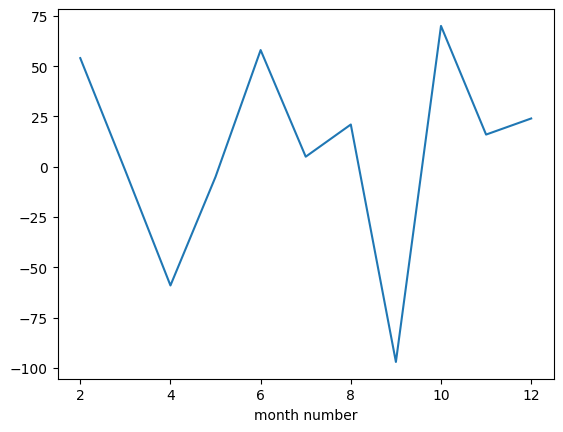

In [112]:
trip['change'].plot()

## Is there a time-of-day pattern in trip frequency (morning, afternoon, night)?

In [116]:
df['hours'] = df['start_date'].dt.hour

In [118]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,trip,month,duration,week name,month number,hours
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce,January,0 days 00:06:00,Friday,1,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce,January,0 days 00:12:00,Saturday,1,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce,January,0 days 00:13:00,Saturday,1,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce,January,0 days 00:14:00,Tuesday,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,January,0 days 01:07:00,Wednesday,1,14


In [119]:
def cal_hour(hour):
    if hour >5 and hour < 12:
        return "Morning"
    elif hour >= 12 and hour <17:
        return "Afternoon"
    elif hour >= 17 and hour <21:
        return "Evening"
    else :
        return "Night"
    

In [121]:
df['time of day'] = df['hours'].apply(cal_hour)

In [122]:
df['time of day'].value_counts()

time of day
Afternoon    446
Evening      328
Morning      240
Night        140
Name: count, dtype: int64

## Which hours of the day are most active for trips?

<Axes: xlabel='hours', ylabel='Count'>

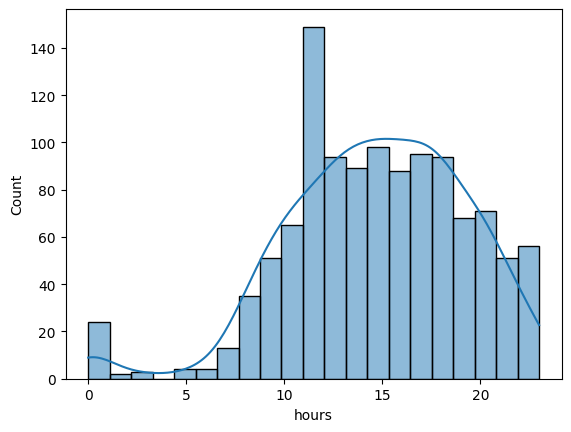

In [125]:
sns.histplot(x=df['hours'],kde=True)

## What is the average distance of trips for each PURPOSE and how do they compare?

In [126]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,trip,month,duration,week name,month number,hours,time of day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Fort Pierce-Fort Pierce,January,0 days 00:06:00,Friday,1,21,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Fort Pierce-Fort Pierce,January,0 days 00:12:00,Saturday,1,1,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Fort Pierce-Fort Pierce,January,0 days 00:13:00,Saturday,1,20,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Fort Pierce-Fort Pierce,January,0 days 00:14:00,Tuesday,1,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,January,0 days 01:07:00,Wednesday,1,14,Afternoon


In [130]:
df.groupby("purpose")['miles'].mean().round(2).sort_values(ascending=False)

purpose
Commute            180.20
Customer Visit      20.69
Meeting             15.28
Charity ($)         15.10
Between Offices     10.94
Temporary Site      10.47
Meal/Entertain       5.70
Airport/Travel       5.50
Moving               4.55
Errand/Supplies      3.97
Name: miles, dtype: float64

## Are there any outlier trips (e.g., trips with extremely long miles)? How many and what are they?

<Axes: xlabel='miles'>

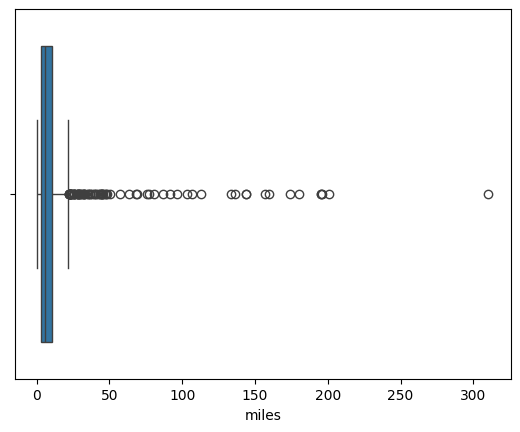

In [132]:
sns.boxplot(x=df['miles'])

<Axes: xlabel='miles', ylabel='Count'>

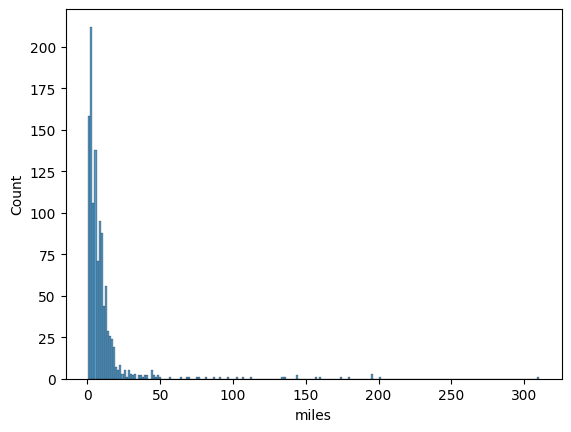

In [133]:
sns.histplot(x=df['miles'])

In [136]:
q1 = df['miles'].quantile(0.25)

In [137]:
q3 = df['miles'].quantile(0.75)

In [138]:
iqr = q3-q1

In [140]:
ub = q3 + iqr*1.5
ub

np.float64(21.65)

In [142]:
(df['miles'] > ub).sum()

np.int64(77)

In [144]:
df[df['miles'] > ub]

,start_date,end_date,category,start,stop,miles,purpose,trip,month,duration,week name,month number,hours,time of day
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Fort Pierce-West Palm Beach,January,0 days 01:07:00,Wednesday,1,14,Afternoon
25,2016-01-14 16:29:00,2016-01-14 17:05:00,Business,Houston,Houston,21.9,Customer Visit,Houston-Houston,January,0 days 00:36:00,Thursday,1,16,Afternoon
36,2016-01-20 13:25:00,2016-01-20 14:19:00,Business,Raleigh,Cary,40.2,Customer Visit,Raleigh-Cary,January,0 days 00:54:00,Wednesday,1,13,Afternoon
62,2016-02-01 12:10:00,2016-02-01 12:43:00,Business,Chapel Hill,Cary,23.3,Customer Visit,Chapel Hill-Cary,February,0 days 00:33:00,Monday,2,12,Afternoon
108,2016-02-16 03:21:00,2016-02-16 04:13:00,Business,Katunayaka,Unknown Location,43.7,Customer Visit,Katunayaka-Unknown Location,February,0 days 00:52:00,Tuesday,2,3,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2016-11-20 10:27:00,2016-11-20 11:32:00,Business,Cary,Cary,39.2,Between Offices,Cary-Cary,November,0 days 01:05:00,Sunday,11,10,Morning
1088,2016-12-21 20:56:00,2016-12-21 23:42:00,Business,Rawalpindi,Unknown Location,103.0,Meeting,Rawalpindi-Unknown Location,December,0 days 02:46:00,Wednesday,12,20,Evening
1089,2016-12-22 15:40:00,2016-12-22 16:38:00,Business,Unknown Location,Unknown Location,32.3,Meeting,Unknown Location-Unknown Location,December,0 days 00:58:00,Thursday,12,15,Afternoon
1092,2016-12-22 17:56:00,2016-12-22 18:29:00,Business,Unknown Location,Unknown Location,23.2,Meeting,Unknown Location-Unknown Location,December,0 days 00:33:00,Thursday,12,17,Evening
